In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Der Boston Housing-Datensatz : die Wohnverhältnisse in 506 Gebieten von Boston 
# 13 stetige und eine binäre (Dummy-)Variable.
# Die Dummy-Variable ( CHAS): entsprechende Gebiet direkt am Charles River liegt.
# Der Median der Hauspreise pro Gebiet ist die abhängige Variable in der ursprünglichen Analyse.
# MMEDV: die Mittelwerte des Houspreis in $1000'S
# Crim: Kriminalitätsrate der Stadt, ZN: Anteil der Wohnungsstücke für Parzellen über 25000m²
# Indus: Anteil der nicht Einzelhandelsgeschäfte pr Stadt,  CHAS:
# NOX: Stickoxid konventration, RM: durschnittliche Anzahl der Zimmer pro Wohnung
# AGE: Anteil der Eigenheime die vor 1940 gebaut wurden,  DIS: Entfernung zu Bostoner Arbeitsämtern
# RAD: Index der Zugänglichkeit zu Radialstraßen, TAX: 
# PTRATIO: Schüler-Lehrer Verhältnis nach Stadt...

In [11]:
h=pd.read_csv("boston_house_prices.csv")
print(h.shape)

(507, 14)


In [12]:
print(h)

         506    13 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       CRIM    ZN      INDUS       CHAS        NOX         RM        AGE   
1    0.00632    18       2.31          0      0.538      6.575       65.2   
2    0.02731     0       7.07          0      0.469      6.421       78.9   
3    0.02729     0       7.07          0      0.469      7.185       61.1   
4    0.03237     0       2.18          0      0.458      6.998       45.8   
5    0.06905     0       2.18          0      0.458      7.147       54.2   
6    0.02985     0       2.18          0      0.458       6.43       58.7   
7    0.08829  12.5       7.87          0      0.524      6.012       66.6   
8    0.14455  12.5       7.87          0      0.524      6.172       96.1   
9    0.21124  12.5       7.87          0      0.524      5.631        100   
10   0.17004  12.5       7.87          0      0.524      6.004       85.9   
11   0.22489  12.5       7.87          0      0.524      6.377       94.3   

In [13]:
from sklearn import datasets
h1=datasets.load_boston()
X, y = h1.data, h1.target

In [14]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.10) 

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
#nur für Trainingdaten
s.fit_transform(X_train) 
# Anwendung der Transformationen auf die Daten
X_train_std = s.fit_transform(X_train)
X_test_std = s.fit_transform(X_test)



In [15]:
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor (hidden_layer_sizes =(10,), max_iter=2000)
mlp.fit(X_train_std, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

    Actual  Predicted
0      9.6  11.856229
1     31.1  29.344065
2     43.1  32.392924
3     50.0  39.042052
4     20.3  20.670449
5     27.5  29.035479
6     21.0  18.503518
7     23.3  22.360782
8     18.5  23.777225
9     45.4  37.767865
10    37.0  26.851988
11    21.2  20.737754
12    16.7  17.365758
13    25.0  24.739936
14    27.0  39.035054
15    19.4  16.214593
16    13.9  14.631149
17    23.0  20.321469
18    12.6  15.332186
19    20.6  22.384113
20    50.0  39.742263
21    16.6  16.271764
22    13.3  11.733205
23    21.2  22.469191
24    33.2  31.157761
25    33.8  29.807126
26    25.0  28.925345
27    20.2  17.510547
28    17.8  16.303685
29    19.3  19.526411
30    24.8  22.759759
31     5.0   7.211270
32    16.7  18.404986
33    18.2  17.278168
34    50.0  36.477940
35    25.0  21.735367
36    25.2  24.039594
37    36.2  27.936902
38    23.2  21.351345
39    48.5  38.961163
40    13.6  16.945053
41    13.4  11.379519
42    44.0  33.410613
43    19.5  20.894188
44    18.7

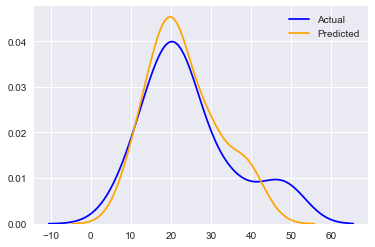

In [16]:
p1=mlp.predict(X_test_std)
df=pd.DataFrame({"Actual": np.array(y_test).flatten(), "Predicted":p1})
print(df)
sns.set()
sns.kdeplot(df["Actual"], color="b")
sns.kdeplot(df["Predicted"], color="orange")
plt.show()

In [19]:
# score= Bestimmtheismaß = R² =1- (Sum (y_true -y_predict)²)/ (sum(y_true - y_true.mean())²)

In [17]:
score=mlp.score(X_test_std, y_test)
print(score)

0.7248029704722498


In [18]:
print(mlp.n_iter_)

1571


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters ={"activation":["identity", "logistic", "tanh", "relu"],
             "solver":["lbfgs", "sgd", "adam"],
             "alpha":[0.001, 0.01, 0.1, 1, 10, 100],
             "learning_rate":["constant", "invscaling", "adaptive"]}
GS=GridSearchCV(estimator= MLPRegressor( hidden_layer_sizes= (10,), max_iter=10000, random_state=1, early_stopping= True),
                 param_grid=parameters)
GS.fit(X_train_std, y_train)

In [ ]:
print(GS.best_params_)

In [ ]:
print(GS.best_score_)  # Score für X_train, y_train

In [ ]:
print(GS.best_estimator_.score(X_test_std, y_test))

In [17]:
from sklearn.model_selection import RandomizedSearchCV
params= {"activation":["identity", "logistic", "tanh", "relu"],
             "solver":["lbfgs", "sgd", "adam"],
             "alpha":[0.001, 0.01, 0.1, 1, 10, 100],
             "learning_rate":["constant", "invscaling", "adaptive"]}
RS= RandomizedSearchCV (estimator=MLPRegressor( hidden_layer_sizes= (20,), max_iter=10000, random_state=1, early_stopping= True),
                 param_distributions=params, n_iter=20)
RS.fit(X_train_std, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [19]:
print(RS.best_params_)

{'solver': 'lbfgs', 'learning_rate': 'constant', 'alpha': 100, 'activation': 'tanh'}


In [20]:
print(RS.best_score_)

0.8108310040188204


In [21]:
print(RS.best_estimator_.score(X_test_std, y_test))

0.7626961601783737
